In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("E:/Userfiles/Desktop/Python/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [9]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [10]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [11]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['TaxInc']= label_encoder.fit_transform(df['TaxInc'])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,0
596,69967,55369,2,1,0,0,1,0
597,47334,154058,0,0,0,0,1,0
598,98592,180083,17,1,1,0,0,0


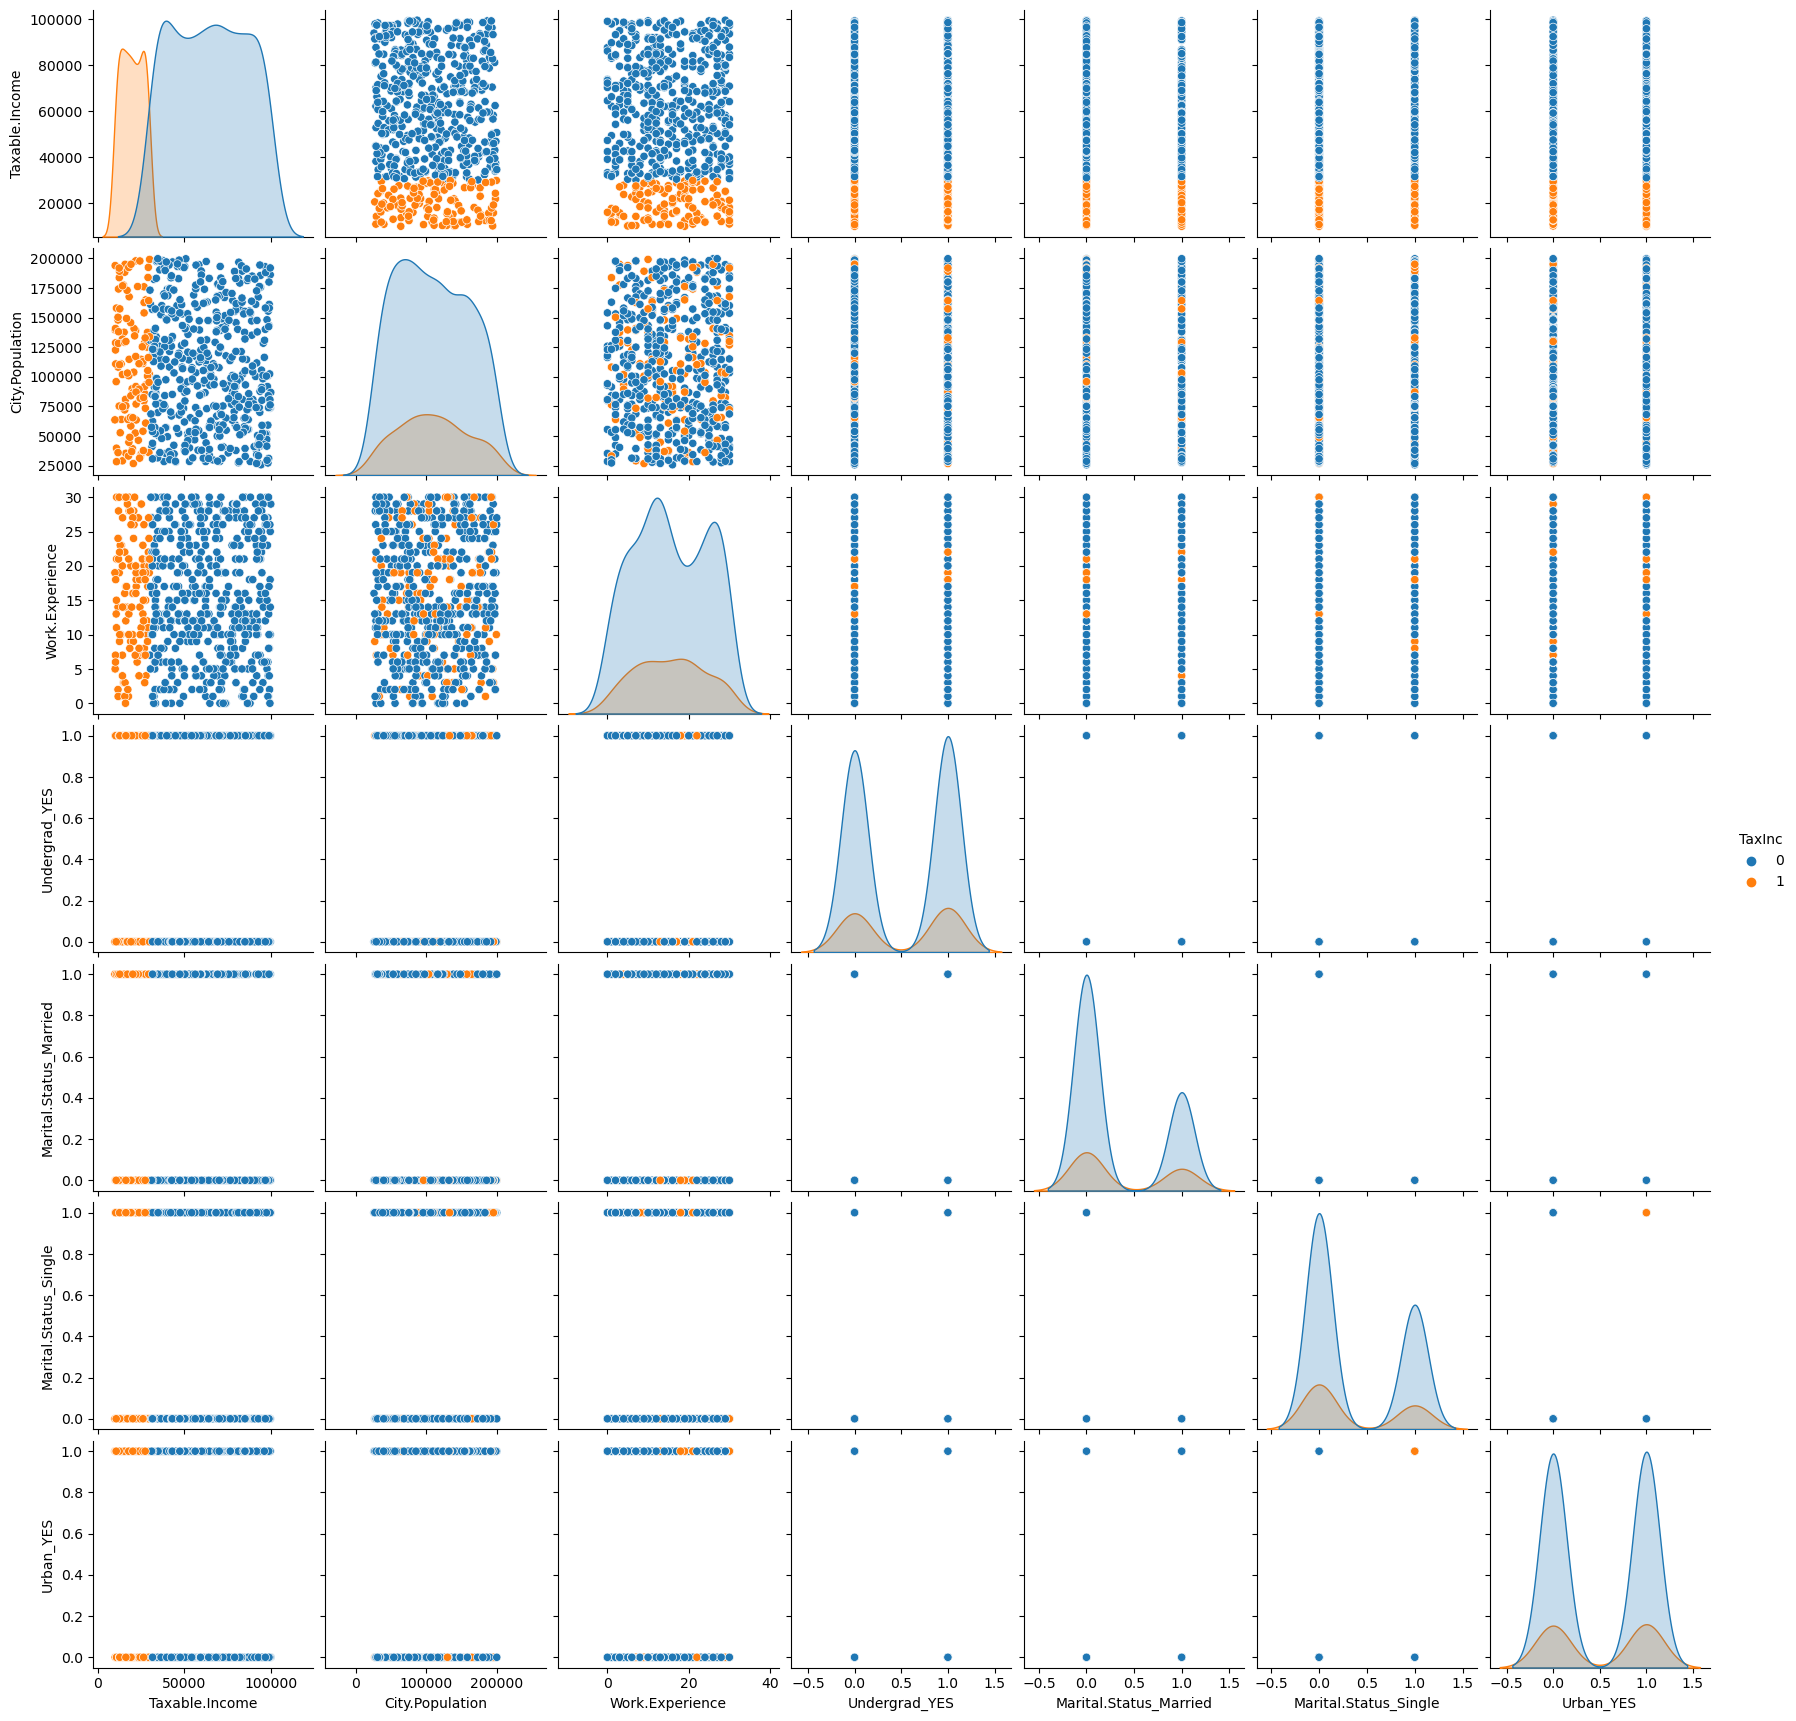

In [14]:
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc')

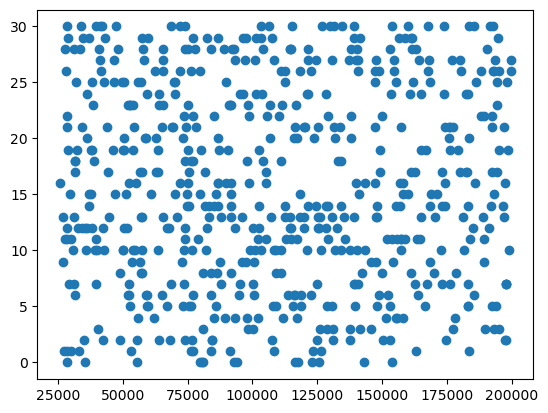

In [19]:
plt.scatter(df['City.Population'], df['Work.Experience'])
plt.show()

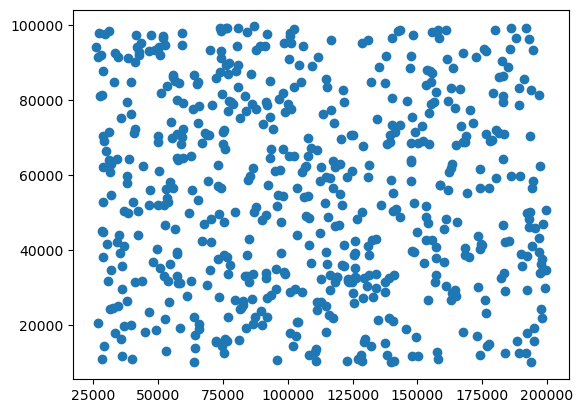

In [20]:
plt.scatter(df['City.Population'], df['Taxable.Income'])
plt.show()

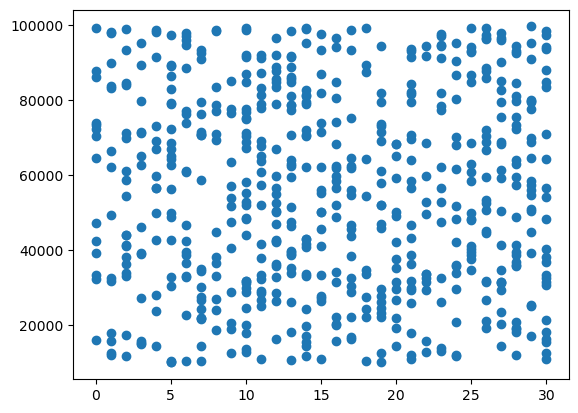

In [21]:
plt.scatter(df['Work.Experience'], df['Taxable.Income'])
plt.show()

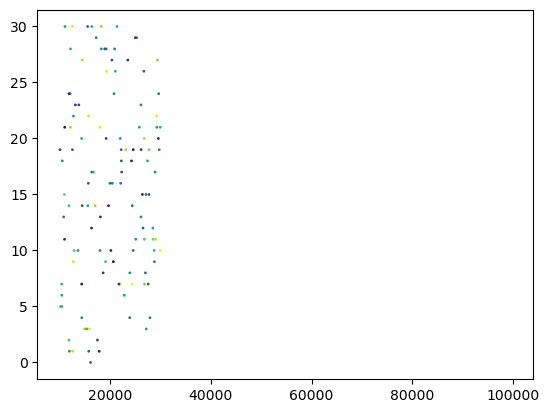

In [22]:
plt.scatter(df['Taxable.Income'], df['Work.Experience'], c=df['City.Population'],
            s=df['TaxInc'])
plt.show()

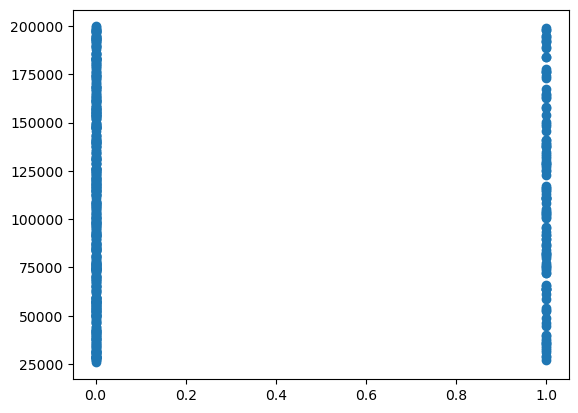

In [24]:
plt.scatter(df['TaxInc'], df['City.Population'])
plt.show()

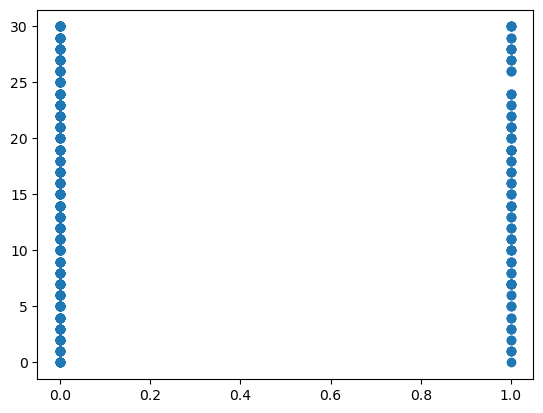

In [25]:
plt.scatter(df['TaxInc'], df['Work.Experience'])
plt.show()

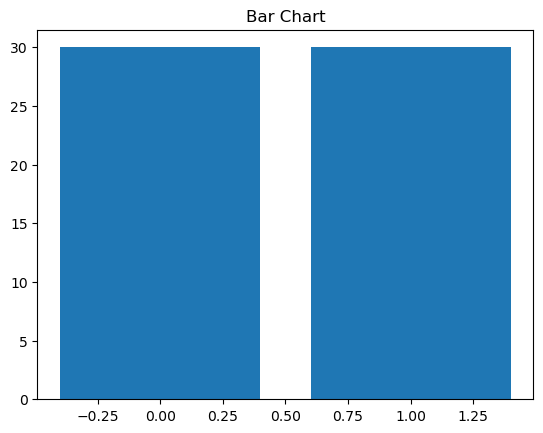

In [34]:
plt.bar(df['TaxInc'], df['Work.Experience'])
 
plt.title("Bar Chart")
 
plt.show()

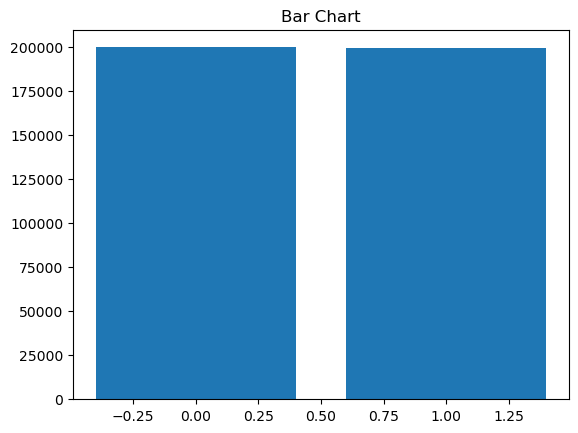

In [35]:
plt.bar(df['TaxInc'], df['City.Population'])
 
plt.title("Bar Chart")
 
plt.show()

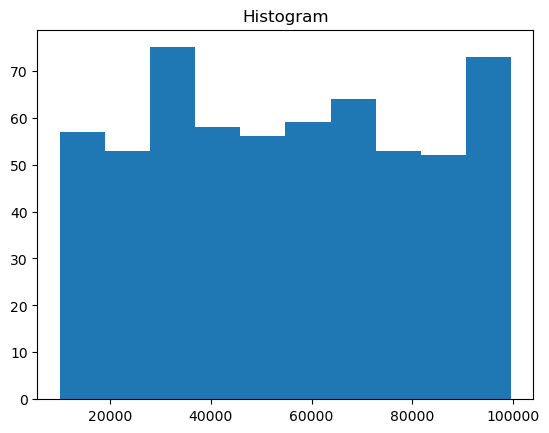

In [38]:
plt.hist(df['Taxable.Income'])
 
plt.title("Histogram")
 
plt.show()    

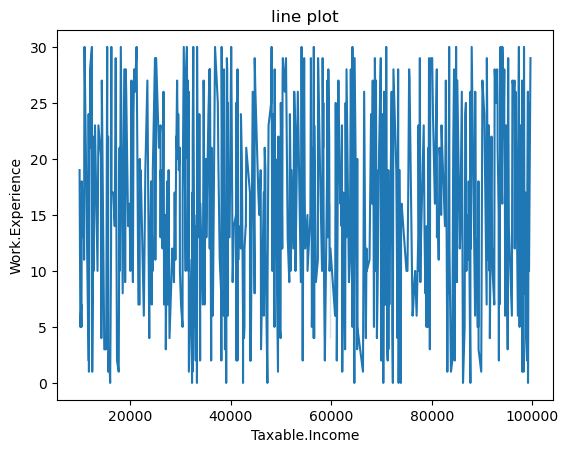

In [40]:
sns.lineplot(x="Taxable.Income", y="Work.Experience", data=df)
 
plt.title('line plot')
 
plt.show()

In [41]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [57]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
590,0.341473,0.466667,0.0,1.0,0.0,1.0,0.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,1.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,0.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,0.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,0.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,0.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,0.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,0.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,0.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,0.0


In [58]:
X = df_norm.drop(['TaxInc'], axis=1)
y = df_norm['TaxInc']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [62]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7366666666666667


In [63]:
results

array([0.78333333, 0.73333333, 0.66666667, 0.7       , 0.71666667,
       0.63333333, 0.85      , 0.71666667, 0.76666667, 0.8       ])

In [64]:
forest_new = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [65]:
print('Train accuracy: {}'.format(forest_new.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest_new.score(Xtest, ytest)))

Train accuracy: 0.8020833333333334
Test accuracy: 0.7916666666666666
